In [1]:
import numpy as np
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/swapnasavalgi/Stock-Exchange/main/indexData.csv'
stock = pd.read_csv(url, parse_dates = True, index_col = "Date")

In [3]:
stock["Index"] = stock["Index"].astype(str)

In [4]:
stock.dropna(inplace=True)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [6]:
stock.columns

Index(['Index', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
table = pd.pivot_table(stock, values = ['Adj Close','Open'], index = ['Date'], aggfunc = {'Adj Close':np.mean,
                      'Open':np.mean})
table.head()

,Adj Close,Open
Date,,
1965-01-05,1257.719971,1257.719971
1965-01-06,1263.989990,1263.989990
1965-01-07,1274.270020,1274.270020
1965-01-08,1286.430054,1286.430054
1965-01-12,1288.540039,1288.540039


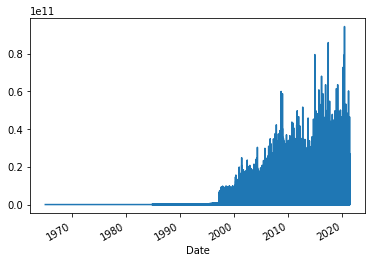

In [8]:
#parse_dates will convert date column to datetimeindex format
stock['Volume'].plot()

There is some big spikes between 2010 and 2020 .

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AEC6AD19E8>,
      dtype=object)

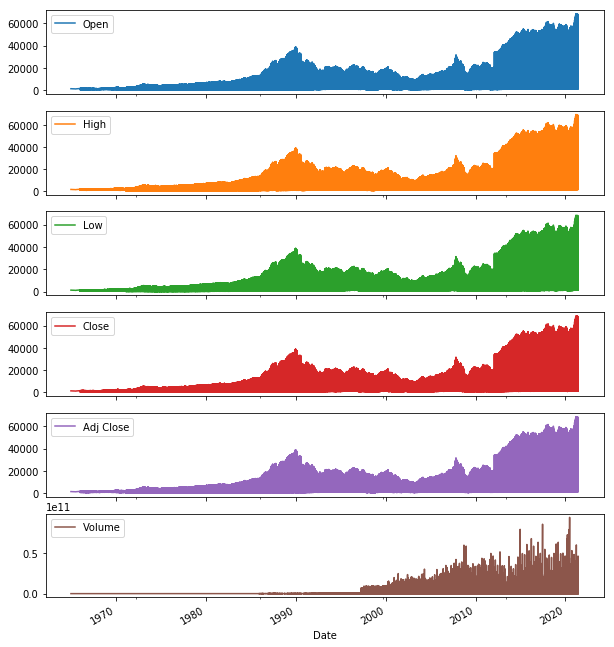

In [9]:
#Examining the curves for other variables 

stock.plot(subplots = True,figsize = (10,12))

Curves for open,close,Adj Close,High,Low are in same shape, but Volume.

<BarContainer object of 30 artists>

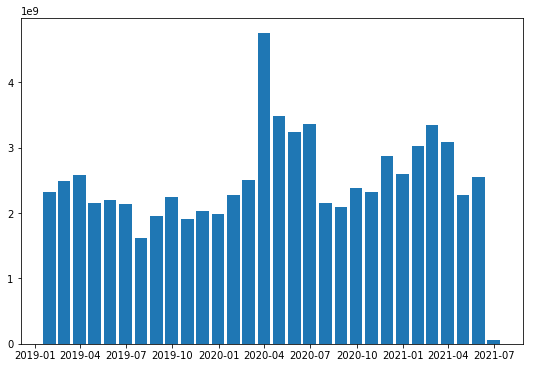

In [10]:
#Resampling for months or weeks 
import matplotlib.dates as mdates

stock_month = stock.resample("M").mean()
fig, ax = plt.subplots(figsize = (9,6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(stock_month['2019':].index,stock_month.loc['2019':,"Volume"], width = 25, align ='center')


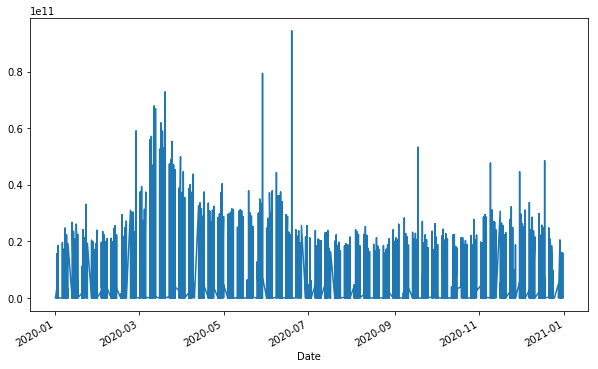

In [11]:
stock['2020']['Volume'].plot(figsize = (10,6))

In [55]:
import calendar


all_months = pd.pivot_table(stock,
                           values = 'Open',
                           index = [stock.index.month],
                           columns = [stock.index.year],
                           fill_value = 0,
                           margins = False)



In [71]:
month_index = [[calendar.month_abbr[i] if isinstance (i,int)
               else i for i in list(all_months.index)]]

all_months = all_months.set_index(month_index)

all_months_new = all_months.loc[:,2012:]
all_months_new

Date,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Jan,6770.044586,10238.973033,11379.951559,12544.963518,11560.148109,12992.699065,15436.813644,13380.346362,15788.179868,17427.080833
Feb,8795.942104,10380.165857,11391.159841,13342.665646,11673.757493,13258.853185,15166.876589,14399.782548,15192.600185,18315.753271
Mar,9301.102892,10252.431679,11274.347779,13204.722309,11804.797618,13082.685816,14488.465582,14288.004418,12564.693500,17849.665026
Apr,9101.366864,10136.738502,11363.375067,13788.802197,12201.386239,12993.678874,14377.642791,14785.365025,12628.132442,17858.125267
May,9007.221026,10503.286107,11522.842480,14082.582547,12102.633034,13667.828321,14864.567892,14302.381884,13502.829741,18461.248701
Jun,8594.424413,10234.104494,11992.194759,13809.756671,12065.515632,13460.123264,14793.887442,14460.526670,14205.400906,15293.620286
Jul,8814.818885,10253.741639,12075.648961,13208.170136,12295.633986,13695.862311,14500.754520,14662.948383,14810.977112,0.000000
Aug,9055.022167,10498.766167,12207.969027,12802.916086,12315.491161,13834.079627,14512.779860,13928.789159,15076.279856,0.000000
Sep,9217.468866,10939.372188,12345.181682,12110.555504,12828.883900,13996.267556,14436.291206,14436.633050,14863.365656,0.000000
Oct,9501.599911,11149.287187,11960.415550,12726.565301,12765.744840,14992.236255,13970.353813,14726.528311,15331.261117,0.000000


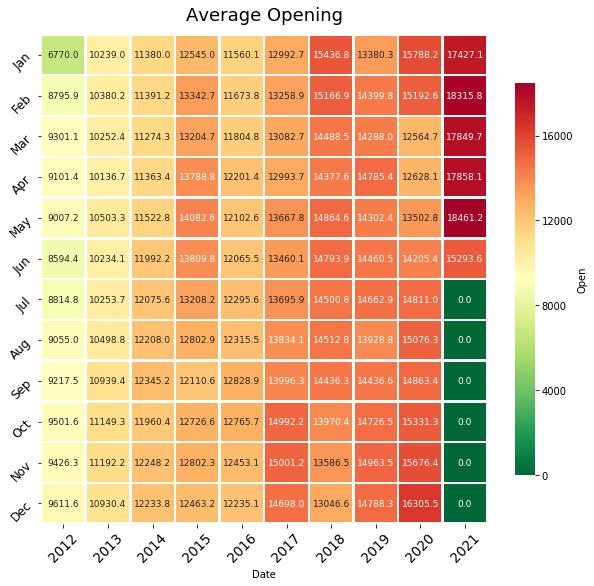

In [74]:
import seaborn as sns
%matplotlib inline 

plt.figure(figsize = (10,9))
ax = sns.heatmap(all_months_new, cmap = 'RdYlGn_r',
                 fmt = ".1f",
                 annot=True, linewidths=1.5, annot_kws={'size':9}, 
                 cbar_kws={'shrink':.8, 'label':'Open'}                
                )
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=13.5)
plt.title('Average Opening', fontdict={'fontsize':18},    pad=14);

Darker red means it was a very high opening.